In [2]:
# from google.colab import drive
# drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import torch
import torchvision.transforms as transforms
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from imblearn.over_sampling import SMOTE
import time
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,auc
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve


In [4]:
df=pd.read_csv('winequality.csv')
df = df.rename(columns={'wine_type.1': 'wine_type'})


In [5]:
df.head(2)

,,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type,binary_quality
0,0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0


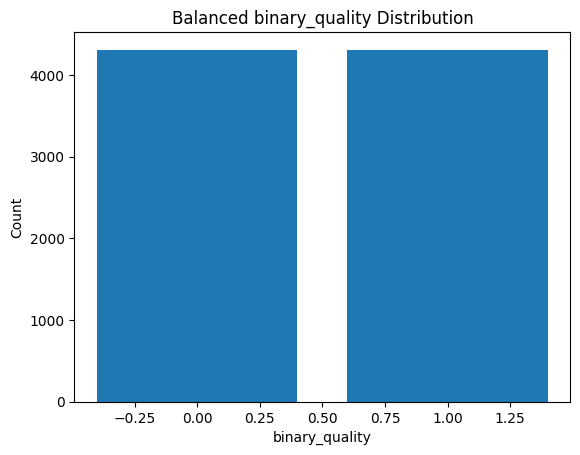

In [6]:
# Split data into features and targets
features = df.drop('binary_quality', axis=1).values
targets = df['binary_quality'].values

# Apply SMOTE to balance the binary_quality column
smote = SMOTE()
features, targets = smote.fit_resample(features, targets)

# Create a new balanced dataframe
df_balanced = pd.DataFrame(features, columns=df.drop('binary_quality', axis=1).columns)
df_balanced['binary_quality'] = targets

# Check the balance of the binary_quality column
df_balanced['binary_quality'].value_counts()


# Create a bar plot
plt.bar(df_balanced['binary_quality'].value_counts().index, df_balanced['binary_quality'].value_counts().values)
plt.xlabel('binary_quality')
plt.ylabel('Count')
plt.title('Balanced binary_quality Distribution')

# Show the plot
plt.show()


In [7]:
# Split data into features and targets
features = df_balanced.drop('binary_quality', axis=1).values
targets = df_balanced['binary_quality'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)





In [8]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled features and targets to tensors
featuresTrain = torch.from_numpy(X_train_scaled).float()
targetsTrain = torch.from_numpy(y_train).long()

featuresTest = torch.from_numpy(X_test_scaled).float()
targetsTest = torch.from_numpy(y_test).long()
# Show the size of features and targets
print("Size of featuresTrain: ", featuresTrain.size())
print("Size of targetsTrain: ", targetsTrain.size())
print("Size of featuresTest: ", featuresTest.size())
print("Size of targetsTest: ", targetsTest.size())

Size of featuresTrain:  torch.Size([6897, 13])
Size of targetsTrain:  torch.Size([6897])
Size of featuresTest:  torch.Size([1725, 13])
Size of targetsTest:  torch.Size([1725])


# **IMPLEMETING SVM MODEL**

In [ ]:
# Define function for evaluating different classifiers
def models_evaluation(X_train, y_train):
    # Define SVMs with different kernels
    svc_linear = SVC(kernel='linear', random_state=1) # Support Vector Machine with linear kernel
    svc_sigmoid = SVC(kernel='sigmoid', random_state=1) # Support Vector Machine with sigmoid kernel
    svc_rbf = SVC(kernel='rbf', gamma='scale', random_state=1) # Support Vector Machine with RBF kernel

    # Define performance metrics to be used for evaluation
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'] # Define a list of metrics to evaluate the classifiers

    # Perform cross-validation on each classifier with 10 folds
    cv_results_linear = cross_validate(svc_linear, X_train, y_train, cv=10, scoring=scoring) # Perform 10-fold cross-validation on the SVM with linear kernel
    cv_results_sigmoid = cross_validate(svc_sigmoid, X_train, y_train, cv=10, scoring=scoring) # Perform 10-fold cross-validation on the SVM with sigmoid kernel
    cv_results_rbf = cross_validate(svc_rbf, X_train, y_train, cv=10, scoring=scoring) # Perform 10-fold cross-validation on the SVM with RBF kernel

    # Compute mean and standard deviation of scores for each classifier
    mean_scores = {} # Initialize an empty dictionary to store the mean scores
    std_scores = {} # Initialize an empty dictionary to store the standard deviation scores

    # Loop through each classifier's cross-validation results and add the mean and standard deviation of each metric to their respective dictionaries
    for cv_results, cv_str in zip([cv_results_linear, cv_results_sigmoid, cv_results_rbf], ['Linear', 'Sigmoid', 'RBF']):
        mean_scores[f'SVM with {cv_str} kernel (10-fold CV)'] = {scorer: np.mean(cv_results[f'test_{scorer}']) for scorer in scoring} # Compute the mean score for each metric and add it to the mean_scores dictionary
        std_scores[f'SVM with {cv_str} kernel (10-fold CV)'] = {scorer: np.std(cv_results[f'test_{scorer}']) for scorer in scoring} # Compute the standard deviation score for each metric and add it to the std_scores dictionary

    return mean_scores, std_scores

# Evaluate classifiers on training data
mean_scores_table, std_scores_table = models_evaluation(featuresTrain, targetsTrain)

# Display the average cross-validation scores
print(mean_scores_table)


{'SVM with Linear kernel (10-fold CV)': {'accuracy': 0.7770053217223029, 'precision': 0.7529357527480617, 'recall': 0.8233931113973828, 'f1': 0.7863418024374755, 'roc_auc': 0.8467652627179192}, 'SVM with Sigmoid kernel (10-fold CV)': {'accuracy': 0.6236105677204938, 'precision': 0.623297423814309, 'recall': 0.6229346057359821, 'f1': 0.6226793114673542, 'roc_auc': 0.652332919994184}, 'SVM with RBF kernel (10-fold CV)': {'accuracy': 0.8231135230643023, 'precision': 0.7924129464506114, 'recall': 0.8743177503559563, 'f1': 0.8313074309839964, 'roc_auc': 0.8995756251917932}}


In [ ]:
# Define function for evaluating different classifiers
def models_evaluation(X_train, y_train):
    # Define SVMs with polynomial kernels of degrees 2, 3, and 4
    svc_poly2 = SVC(kernel='poly', degree=2, random_state=1)
    svc_poly3 = SVC(kernel='poly', degree=3, random_state=1)
    svc_poly4 = SVC(kernel='poly', degree=4, random_state=1)

    # Define performance metrics to be used for evaluation
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

    # Perform cross-validation on each classifier with 10 folds
    cv_results_poly2 = cross_validate(svc_poly2, X_train, y_train, cv=10, scoring=scoring)
    cv_results_poly3 = cross_validate(svc_poly3, X_train, y_train, cv=10, scoring=scoring)
    cv_results_poly4 = cross_validate(svc_poly4, X_train, y_train, cv=10, scoring=scoring)

    # Compute mean and standard deviation of scores for each classifier
    mean_scores = {}
    std_scores = {}

    for cv_results, cv_str in zip([cv_results_poly2, cv_results_poly3, cv_results_poly4], ['Poly2', 'Poly3', 'Poly4']):
        mean_scores[f'SVM with {cv_str} kernel (10-fold CV)'] = {scorer: np.mean(cv_results[f'test_{scorer}']) for scorer in scoring}
        std_scores[f'SVM with {cv_str} kernel (10-fold CV)'] = {scorer: np.std(cv_results[f'test_{scorer}']) for scorer in scoring}

    return mean_scores, std_scores

# Evaluate classifiers on training data
mean_scores_table, std_scores_table = models_evaluation(featuresTrain, targetsTrain)

# Display the average cross-validation scores
print(mean_scores_table)



{'SVM with Poly2 kernel (10-fold CV)': {'accuracy': 0.728872552112913, 'precision': 0.6832241643012209, 'recall': 0.8510399010102379, 'f1': 0.7578681750617492, 'roc_auc': 0.8051672161961013}, 'SVM with Poly3 kernel (10-fold CV)': {'accuracy': 0.7920849372120906, 'precision': 0.7327108393291124, 'recall': 0.9179588446674352, 'f1': 0.8148610968850012, 'roc_auc': 0.8638047666207997}, 'SVM with Poly4 kernel (10-fold CV)': {'accuracy': 0.7690311520582235, 'precision': 0.699240361422573, 'recall': 0.9426791646891314, 'f1': 0.802791836981914, 'roc_auc': 0.8794161880084357}}


## Hyperparameter grid search 

In [82]:
kernels = ['rbf', 'sigmoid']
regc = list(10 ** np.arange(-3, 2, 1, dtype=float))
gammas = list(10 ** np.arange(-3, 2, 1, dtype=float))

svm_params_lin = {'C': regc, 'kernel': ['linear']}
svm_params_rest = {'C': regc, 'kernel': kernels, 'gamma': gammas}
svm_params = [svm_params_lin, svm_params_rest]

svm = SVC()
gridsearch_cv = GridSearchCV(svm, svm_params, cv=10)
gridsearch_cv.fit(featuresTrain, targetsTrain)
print('Best parameters found:\n', gridsearch_cv.best_params_)
print("Results for all hyperparameter combinations:")
results = gridsearch_cv.cv_results_
for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print(f"{mean_score:.3f} for {params}")


Best parameters found:
 {'C': 10.0, 'gamma': 1.0, 'kernel': 'rbf'}
Results for all hyperparameter combinations:
0.767 for {'C': 0.001, 'kernel': 'linear'}
0.775 for {'C': 0.01, 'kernel': 'linear'}
0.775 for {'C': 0.1, 'kernel': 'linear'}
0.776 for {'C': 1.0, 'kernel': 'linear'}
0.777 for {'C': 10.0, 'kernel': 'linear'}
0.502 for {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
0.502 for {'C': 0.001, 'gamma': 0.001, 'kernel': 'sigmoid'}
0.502 for {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
0.502 for {'C': 0.001, 'gamma': 0.01, 'kernel': 'sigmoid'}
0.502 for {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}
0.723 for {'C': 0.001, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.502 for {'C': 0.001, 'gamma': 1.0, 'kernel': 'rbf'}
0.703 for {'C': 0.001, 'gamma': 1.0, 'kernel': 'sigmoid'}
0.502 for {'C': 0.001, 'gamma': 10.0, 'kernel': 'rbf'}
0.703 for {'C': 0.001, 'gamma': 10.0, 'kernel': 'sigmoid'}
0.502 for {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
0.502 for {'C': 0.01, 'gamma': 0.001, 'kernel': 'sigmoid

In [ ]:

kernels = ['linear', 'poly']
regc = list(10 ** np.arange(-3, 2, 1, dtype=float))
gammas = list(10 ** np.arange(-3, 2, 1, dtype=float))
degrees = [2, 3, 4]

svm_params_lin = {'C': regc, 'kernel': ['linear']}
svm_params_poly = {'C': regc, 'kernel': ['poly'], 'degree': degrees}
svm_params = [svm_params_lin, svm_params_poly]

svm = SVC()
gridsearch_cv = GridSearchCV(svm, svm_params, cv=10)
gridsearch_cv.fit(featuresTrain, targetsTrain)
print('Best parameters found:\n', gridsearch_cv.best_params_)

print("Results for all hyperparameter combinations:")
results = gridsearch_cv.cv_results_
for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print(f"{mean_score:.3f} for {params}")

Results for all hyperparameter combinations:
0.767 for {'C': 0.001, 'kernel': 'linear'}
0.774 for {'C': 0.01, 'kernel': 'linear'}
0.778 for {'C': 0.1, 'kernel': 'linear'}
0.778 for {'C': 1.0, 'kernel': 'linear'}
0.779 for {'C': 10.0, 'kernel': 'linear'}
0.575 for {'C': 0.001, 'degree': 2, 'kernel': 'poly'}
0.584 for {'C': 0.001, 'degree': 3, 'kernel': 'poly'}
0.549 for {'C': 0.001, 'degree': 4, 'kernel': 'poly'}
0.624 for {'C': 0.01, 'degree': 2, 'kernel': 'poly'}
0.680 for {'C': 0.01, 'degree': 3, 'kernel': 'poly'}
0.628 for {'C': 0.01, 'degree': 4, 'kernel': 'poly'}
0.688 for {'C': 0.1, 'degree': 2, 'kernel': 'poly'}
0.745 for {'C': 0.1, 'degree': 3, 'kernel': 'poly'}
0.700 for {'C': 0.1, 'degree': 4, 'kernel': 'poly'}
0.729 for {'C': 1.0, 'degree': 2, 'kernel': 'poly'}
0.791 for {'C': 1.0, 'degree': 3, 'kernel': 'poly'}
0.775 for {'C': 1.0, 'degree': 4, 'kernel': 'poly'}
0.741 for {'C': 10.0, 'degree': 2, 'kernel': 'poly'}
0.806 for {'C': 10.0, 'degree': 3, 'kernel': 'poly'}
0.821 f

In [9]:
svm = SVC(C=10.0, gamma=1.0, kernel='rbf',probability=True)

In [10]:
svm.fit(featuresTrain,targetsTrain)
y_pred_train = svm.predict(featuresTrain)
train_acc = accuracy_score(y_pred_train, targetsTrain)
print("Train acc - ",train_acc)

pred = svm.predict(featuresTest)
accuracy_score(pred, targetsTest)


Train acc -  0.999275047121937


0.9142028985507247

In [12]:
from joblib import load,dump

In [13]:
dump(svm,'svm_final_model.joblib')

['svm_final_model.joblib']

In [13]:
svm_loaded = load('svm_final_model.joblib')

In [14]:
svm_loaded = load('svm_final_model.joblib')
y_pred_train = svm_loaded.predict(featuresTrain)

pred = svm_loaded.predict(featuresTest)
accuracy_score(pred, targetsTest)

0.9211594202898551

In [15]:
cm = confusion_matrix(pred, targetsTest)
print(cm)

[[778  63]
 [ 73 811]]


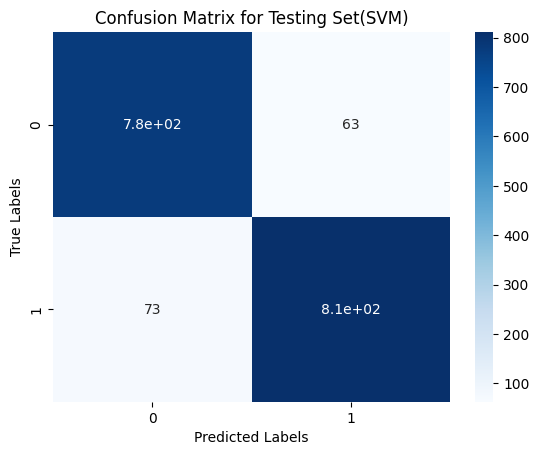

In [16]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Testing Set(SVM)')
plt.show()

In [17]:
cm = confusion_matrix(y_pred_train, targetsTrain)
print(cm)


[[3458    1]
 [   2 3436]]


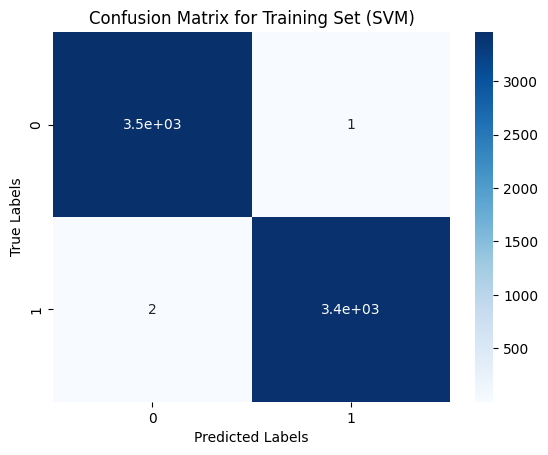

In [18]:

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Training Set (SVM)')
plt.show()

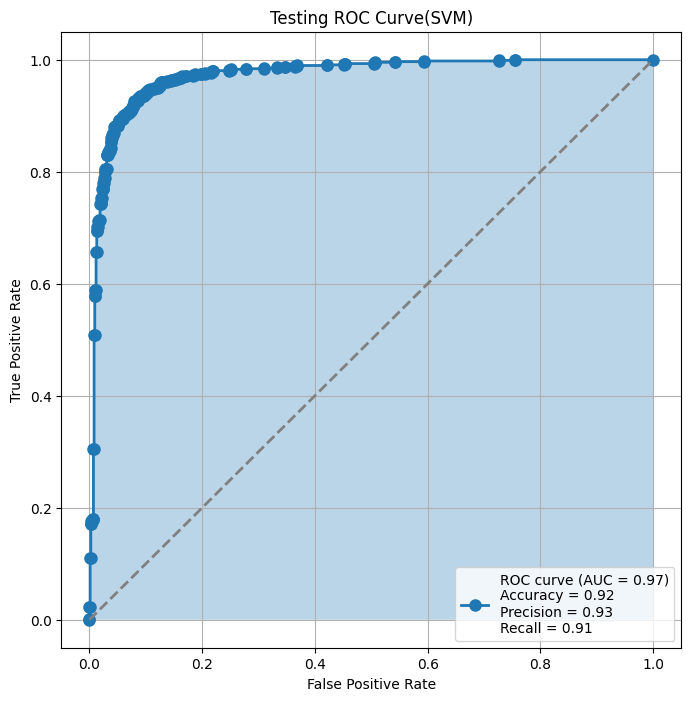

In [19]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
 #Compute the ROC curve and AUC score
pred16 = svm.predict_proba(featuresTest)[:,1]

fpr, tpr, thresholds = roc_curve( targetsTest,pred16)
auc_score = auc(fpr, tpr)

# Compute the accuracy, precision, and recall scores
accuracy = accuracy_score(targetsTest, pred16.round())
precision = precision_score(targetsTest, pred16.round())
recall = recall_score(targetsTest, pred16.round())

# Plot the ROC curve with improved labeling, a color map, and markers
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, marker='o', markersize=8, label='ROC curve (AUC = %0.2f)\nAccuracy = %0.2f\nPrecision = %0.2f\nRecall = %0.2f' % (auc_score, accuracy, precision, recall), linewidth=2)
plt.fill_between(fpr, tpr, 0, cmap=plt.cm.Reds, alpha=0.3)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing ROC Curve(SVM)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


6897
tensor([1, 0, 0,  ..., 1, 0, 1])


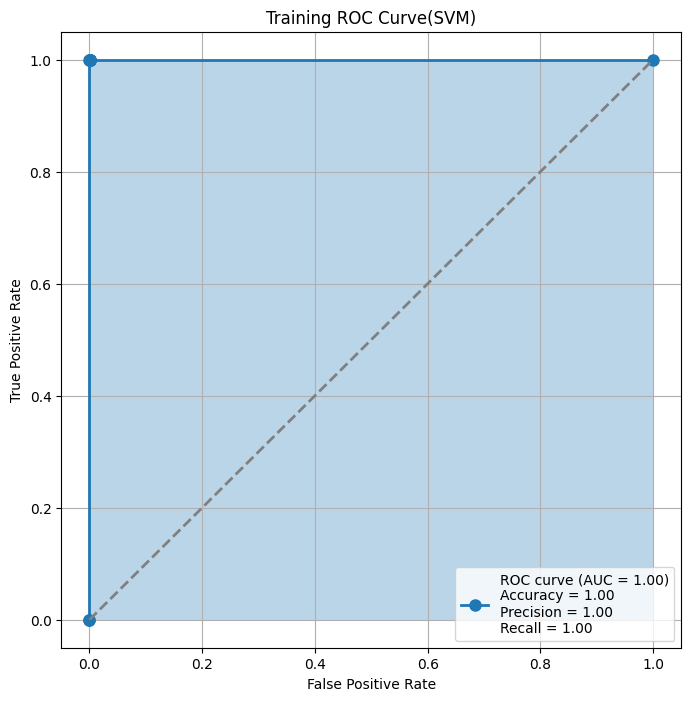

In [20]:
pred17 = svm.predict_proba(featuresTrain)[:,1]
print(len(pred17))
print(targetsTrain)

fpr, tpr, thresholds = roc_curve( targetsTrain,pred17)
auc_score = auc(fpr, tpr)

# Compute the accuracy, precision, and recall scores
accuracy = accuracy_score(targetsTrain, pred17.round())
precision = precision_score(targetsTrain, pred17.round())
recall = recall_score(targetsTrain, pred17.round())

# Plot the ROC curve with improved labeling, a color map, and markers
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, marker='o', markersize=8, label='ROC curve (AUC = %0.2f)\nAccuracy = %0.2f\nPrecision = %0.2f\nRecall = %0.2f' % (auc_score, accuracy, precision, recall), linewidth=2)
plt.fill_between(fpr, tpr, 0, cmap=plt.cm.Reds, alpha=0.3)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training ROC Curve(SVM)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [29]:
# assuming you have trained an SVM model and made predictions on a test set
predictions = svm.predict(featuresTest)

# generate classification report
report = classification_report(targetsTest, predictions)

# print the report
print(report)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       851
           1       0.92      0.93      0.93       874

    accuracy                           0.92      1725
   macro avg       0.92      0.92      0.92      1725
weighted avg       0.92      0.92      0.92      1725



## **MLP MODEL**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score

# Define the MLPClassifier model with the specified parameters
hidden_layer_sizes = [(5,), (5,5), (6,5), (6,9), (10,10), (15,10), (15,15), (10,10,10), (15,15,15)]
activation = 'relu'
solver = 'adam'
max_iter = 50
early_stopping = True

for layer in hidden_layer_sizes:
    mlp = MLPClassifier(hidden_layer_sizes=layer, activation=activation, solver=solver, max_iter=max_iter, batch_size='auto', early_stopping=early_stopping, random_state=42)
    
    # Train the model on the training data
    mlp.fit(featuresTrain, targetsTrain)

    # Make predictions on the training data
    predictions = mlp.predict(featuresTrain)

    # Evaluate the performance of the model
    accuracy = accuracy_score(targetsTrain, predictions)
    f1 = f1_score(targetsTrain, predictions)
    recall = recall_score(targetsTrain, predictions)
    roc_auc = roc_auc_score(targetsTrain, predictions)

    # Print the evaluation metrics
    print(f"Layer {layer}:")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Recall: {recall}")
    print(f"ROC AUC: {roc_auc}")

    # Print the training loss
    train_loss = mlp.loss_
    print(f"Training Loss: {train_loss}\n")


Layer (5,):
Accuracy: 0.7849789763665361
F1 Score: 0.7941707147814018
Recall: 0.8324119871981379
ROC AUC: 0.7851366294372193
Training Loss: 0.4560686761785686

Layer (5, 5):
Accuracy: 0.7901986370885893
F1 Score: 0.7966268446943078
Recall: 0.8245562990980506
ROC AUC: 0.7903128316299501
Training Loss: 0.45642389362492974

Layer (6, 5):
Accuracy: 0.7881687690300131
F1 Score: 0.7979532568109527
Recall: 0.8393948210648822
ROC AUC: 0.788339029029551
Training Loss: 0.4556537379198657

Layer (6, 9):
Accuracy: 0.7955632883862549
F1 Score: 0.8076398362892224
Recall: 0.861216176898458
ROC AUC: 0.7957814988538532
Training Loss: 0.4495944214516214

Layer (10, 10):
Accuracy: 0.7990430622009569
F1 Score: 0.8051728985099804
Recall: 0.833284841431481
ROC AUC: 0.7991568715827925
Training Loss: 0.42738884574696767



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Layer (15, 10):
Accuracy: 0.8122372045817022
F1 Score: 0.8192098282842385
Recall: 0.853651440209485
ROC AUC: 0.8123748530527194
Training Loss: 0.40577331422507024

Layer (15, 15):
Accuracy: 0.802522836015659
F1 Score: 0.8099888392857143
Recall: 0.8446319464649403
ROC AUC: 0.8026627940417187
Training Loss: 0.4296861843245569

Layer (10, 10, 10):
Accuracy: 0.8093373930694505
F1 Score: 0.8203306462631508
Recall: 0.8734361361652604
ROC AUC: 0.8095504380248267
Training Loss: 0.42518701586678115

Layer (15, 15, 15):
Accuracy: 0.7946933449325794
F1 Score: 0.8042576721039536
Recall: 0.8463776549316264
ROC AUC: 0.7948651280438479
Training Loss: 0.42437616853833166



In [10]:
mlp_gs = MLPClassifier(max_iter=1000)
parameter_space = {
    'hidden_layer_sizes': [(5,), (5,5), (6,5), (6,9)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'momentum': [0.1, 1, 3]
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=10)
clf.fit(featuresTrain, targetsTrain)
print('Best parameters found:\n', clf.best_params_)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
640 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
640 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 747, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-pa

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (6, 5), 'learning_rate': 'adaptive', 'momentum': 1, 'solver': 'adam'}
0.769 (+/-0.025) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (5,), 'learning_rate': 'constant', 'momentum': 0.1, 'solver': 'sgd'}
0.798 (+/-0.026) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (5,), 'learning_rate': 'constant', 'momentum': 0.1, 'solver': 'adam'}
0.759 (+/-0.033) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (5,), 'learning_rate': 'constant', 'momentum': 1, 'solver': 'sgd'}
0.798 (+/-0.031) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (5,), 'learning_rate': 'constant', 'momentum': 1, 'solver': 'adam'}
nan (+/-nan) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (5,), 'learning_rate': 'constant', 'momentum': 3, 'solver': 'sgd'}
nan (+/-nan) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (5,), 'learning

In [11]:
mlp_gs = MLPClassifier(max_iter=1000)
parameter_space = {
    'hidden_layer_sizes': [(10,10), (15,10), (15,15), (10,10,10)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'momentum': [0.1, 1, 3]
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=10)
clf.fit(featuresTrain, targetsTrain)
print('Best parameters found:\n', clf.best_params_)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
640 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
640 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 747, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-pa

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (15, 15), 'learning_rate': 'constant', 'momentum': 1, 'solver': 'adam'}
0.772 (+/-0.033) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'momentum': 0.1, 'solver': 'sgd'}
0.817 (+/-0.029) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'momentum': 0.1, 'solver': 'adam'}
0.788 (+/-0.037) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'momentum': 1, 'solver': 'sgd'}
0.814 (+/-0.020) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'momentum': 1, 'solver': 'adam'}
nan (+/-nan) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'momentum': 3, 'solver': 'sgd'}
nan (+/-nan) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
160 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 747, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-pac

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (15, 15, 15), 'learning_rate': 'adaptive', 'momentum': 1, 'solver': 'adam'}
0.777 (+/-0.028) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (15, 15, 15), 'learning_rate': 'constant', 'momentum': 0.1, 'solver': 'sgd'}
0.828 (+/-0.033) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (15, 15, 15), 'learning_rate': 'constant', 'momentum': 0.1, 'solver': 'adam'}
0.793 (+/-0.038) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (15, 15, 15), 'learning_rate': 'constant', 'momentum': 1, 'solver': 'sgd'}
0.834 (+/-0.025) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (15, 15, 15), 'learning_rate': 'constant', 'momentum': 1, 'solver': 'adam'}
nan (+/-nan) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (15, 15, 15), 'learning_rate': 'constant', 'momentum': 3, 'solver': 'sgd'}
nan (+/-nan) for {'activation': 'tanh', 'alpha

In [34]:
mlp = MLPClassifier(
    activation='tanh',
    alpha=0.0001,
    hidden_layer_sizes=(15, 15, 15),
    learning_rate='adaptive',
    momentum=1,
    solver='adam')


mlp.fit(featuresTrain, targetsTrain)
y_pred_train1 = mlp.predict(featuresTrain)
pred1 = mlp.predict(featuresTest)
accuracy_score(pred1, targetsTest)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8463768115942029

In [35]:
cm = confusion_matrix(pred1, targetsTest)
print(cm)

[[700 114]
 [151 760]]


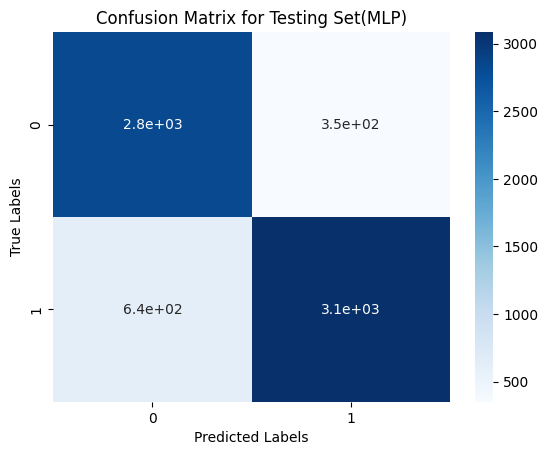

In [40]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Testing Set(MLP)')
plt.show()

In [91]:
cm = confusion_matrix(y_pred_train1, targetsTrain)
print(cm)

[[2821  352]
 [ 639 3085]]


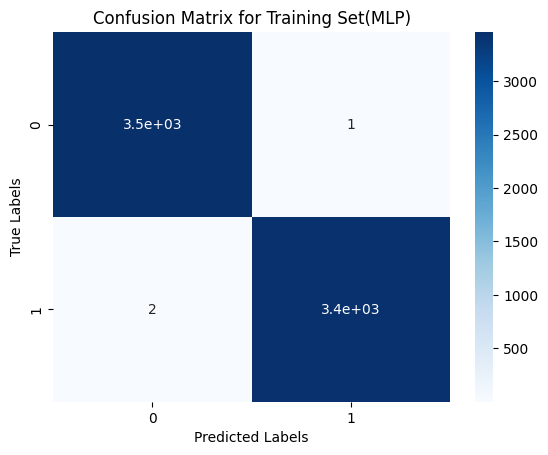

In [90]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Training Set(MLP)')
plt.show()

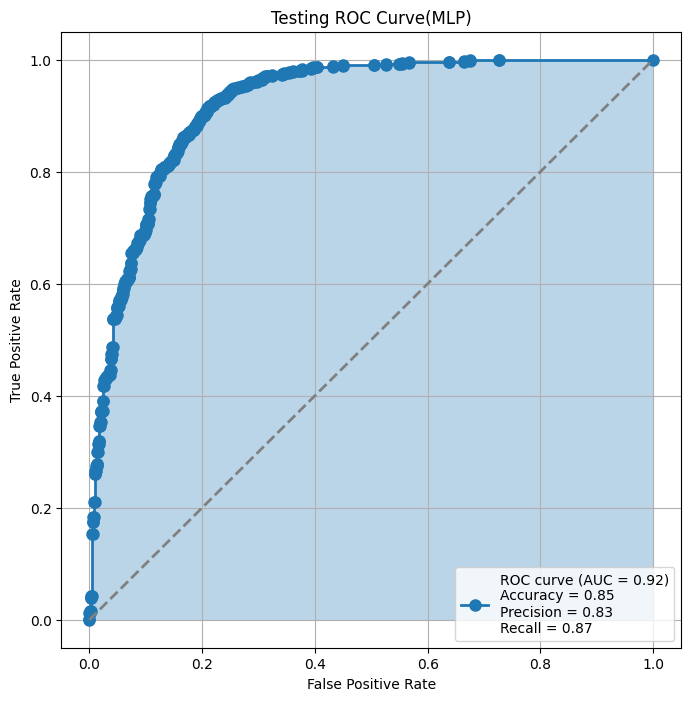

In [50]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
 #Compute the ROC curve and AUC score
pred14 = mlp.predict_proba(featuresTest)[:,1]

fpr, tpr, thresholds = roc_curve( targetsTest,pred14)
auc_score = auc(fpr, tpr)

# Compute the accuracy, precision, and recall scores
accuracy = accuracy_score(targetsTest, pred14.round())
precision = precision_score(targetsTest, pred14.round())
recall = recall_score(targetsTest, pred14.round())

# Plot the ROC curve with improved labeling, a color map, and markers
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, marker='o', markersize=8, label='ROC curve (AUC = %0.2f)\nAccuracy = %0.2f\nPrecision = %0.2f\nRecall = %0.2f' % (auc_score, accuracy, precision, recall), linewidth=2)
plt.fill_between(fpr, tpr, 0, cmap=plt.cm.Reds, alpha=0.3)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing ROC Curve(MLP)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

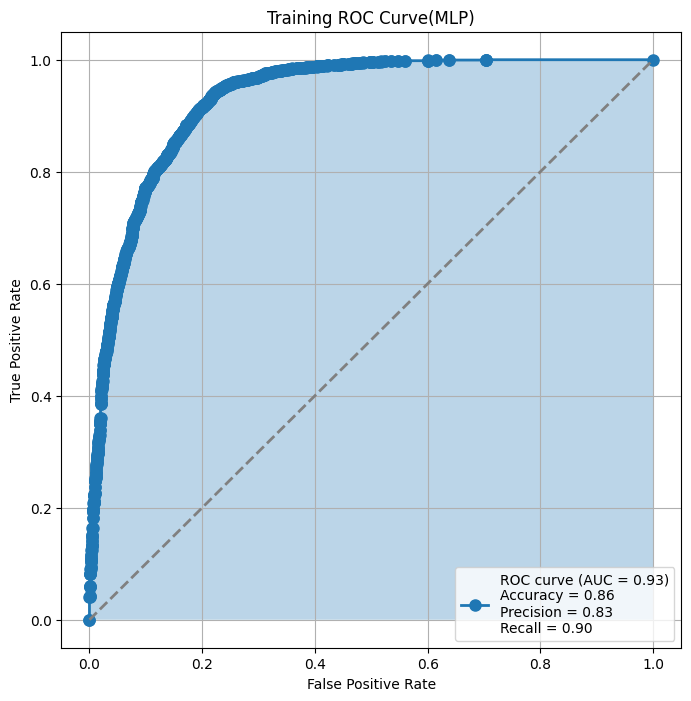

In [89]:
 #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
 #Compute the ROC curve and AUC score
pred15 = mlp.predict_proba(featuresTrain)[:,1]

fpr, tpr, thresholds = roc_curve( targetsTrain,pred15)
auc_score = auc(fpr, tpr)

# Compute the accuracy, precision, and recall scores
accuracy = accuracy_score(targetsTrain, pred15.round())
precision = precision_score(targetsTrain, pred15.round())
recall = recall_score(targetsTrain, pred15.round())

# Plot the ROC curve with improved labeling, a color map, and markers
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, marker='o', markersize=8, label='ROC curve (AUC = %0.2f)\nAccuracy = %0.2f\nPrecision = %0.2f\nRecall = %0.2f' % (auc_score, accuracy, precision, recall), linewidth=2)
plt.fill_between(fpr, tpr, 0, cmap=plt.cm.Reds, alpha=0.3)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training ROC Curve(MLP)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

SVM FINAL MODEL


In [15]:
svm_loaded = load('svm_final_model.joblib')


In [16]:
svm_loaded = load('svm_final_model.joblib')
y_pred_train = svm_loaded.predict(featuresTrain)

pred = svm_loaded.predict(featuresTest)
accuracy_score(pred, targetsTest)

0.9142028985507247

MLP FINAL MODEL

In [18]:
dump(mlp,'mlp_final_model.joblib')

['mlp_final_model.joblib']

In [19]:
mlp_loaded = load('mlp_final_model.joblib')
y_pred_train = mlp_loaded.predict(featuresTrain)

pred = mlp_loaded.predict(featuresTest)
accuracy_score(pred, targetsTest)

0.8446376811594203